# ShapeNet

## Dataset

In [3]:
import torch
from torch import nn
from torch import optim
import os
import os.path as osp

import pytorch_lightning as pl

from torch.utils.data import DataLoader
from data.PartNet.PartNetDataLoader import H5Dataset

from pytorch_lightning.loggers import WandbLogger

In [2]:
category = 'Chair'
level = 2
batch = 2
fixed_points = 1024
num_workers = 8

data_folder = 'data/PartNet/sem_seg_h5/'
path = osp.realpath(osp.join('..', data_folder, '%s-%d' % (category, level), 'test_files.txt'))

test_dataset = H5Dataset(path, fixed_points)
test_loader = DataLoader(test_dataset, batch_size=batch, shuffle=False, num_workers=num_workers, drop_last=True)

In [ ]:
from hpcs.utils.viz import plot_cloud

In [ ]:
cloud = test_dataset.__getitem__(1)

In [ ]:
points, targets = cloud

In [ ]:
plotter = plot_cloud(xyz=points, scalars=targets, point_size=3.0, notebook=True)

## Model

In [4]:
import wandb
import yaml
from test import configure

In [ ]:
os.remove(os.path.join(os.getcwd(), 'config.yaml'))

In [ ]:
os.remove(os.path.join(os.getcwd(), 'model.ckpt'))

In [5]:
config_yaml = wandb.restore(name='config.yaml', run_path='princepi/HPCS/runs/ijtsqh83')
config = yaml.load(config_yaml, Loader=yaml.FullLoader)

In [6]:
model, trainer = configure(config)

C:\Users\olvcp\anaconda3\envs\hyperbolic\lib\site-packages\pytorch_lightning\utilities\parsing.py:261: UserWarning: Attribute 'nn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['nn'])`.
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [7]:
wandb.restore('model.ckpt', run_path='princepi/HPCS/runs/ijtsqh83')
model = model.load_from_checkpoint('model.ckpt')

Testing: 0it [00:00, ?it/s]

C:\Users\olvcp\PycharmProjects\HPCS\hpcs\loss\ultrametric_loss.py:68: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2318.)
  lca_triplet = torch.stack([dij, dik, djk]).T


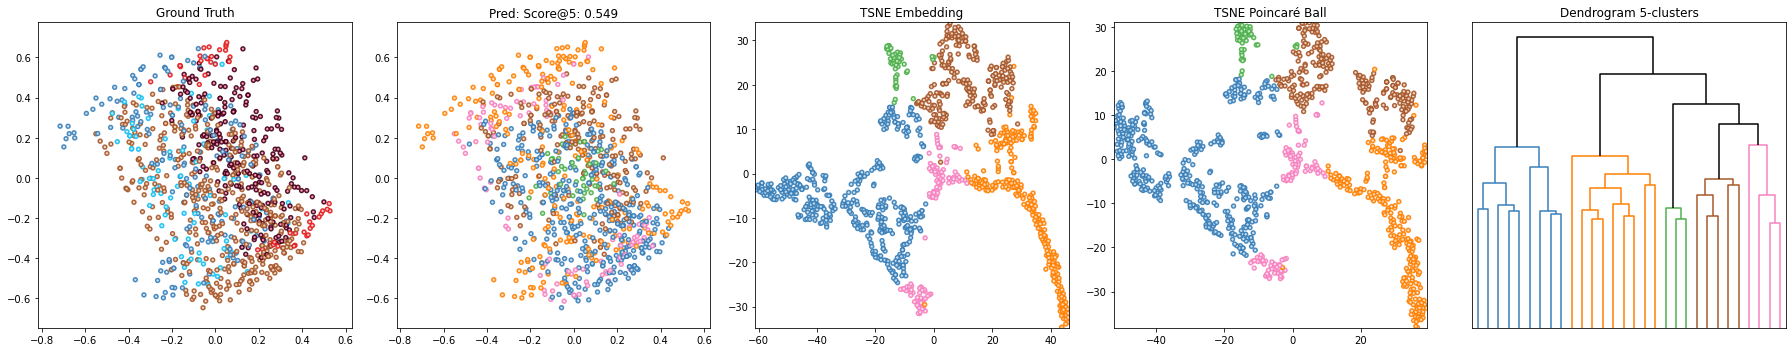

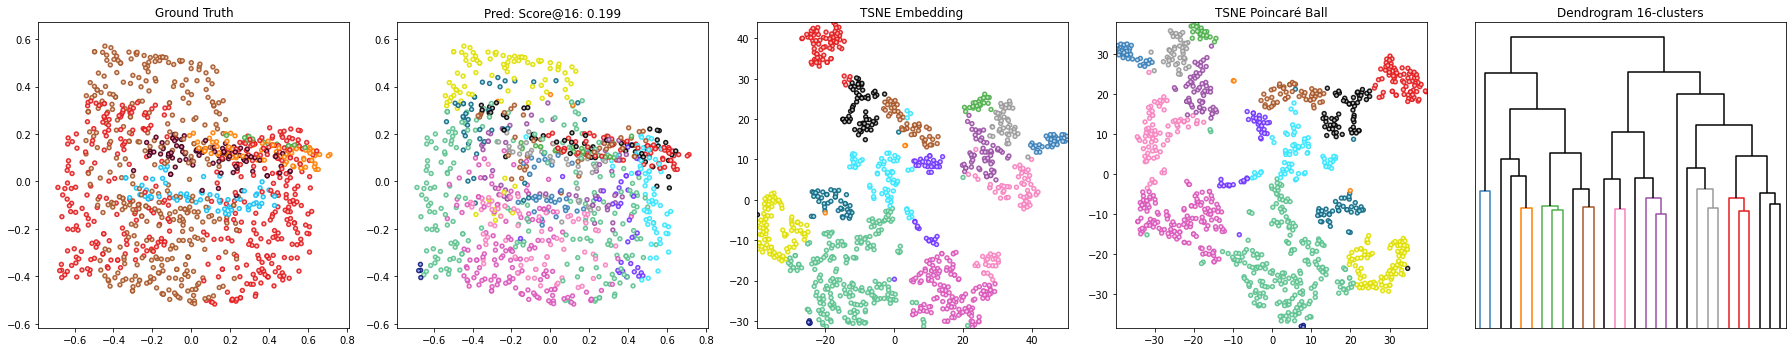

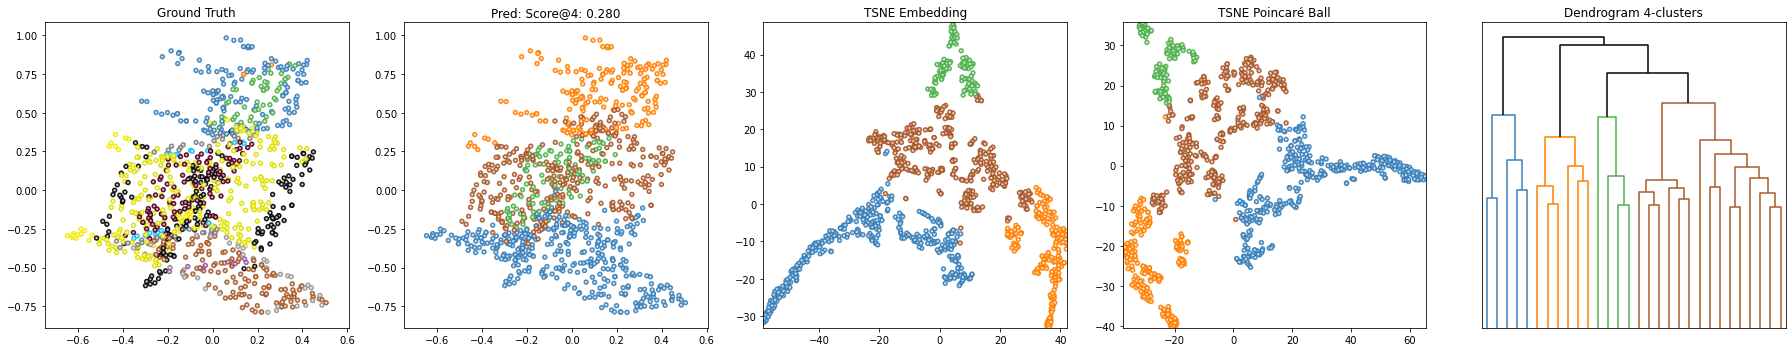

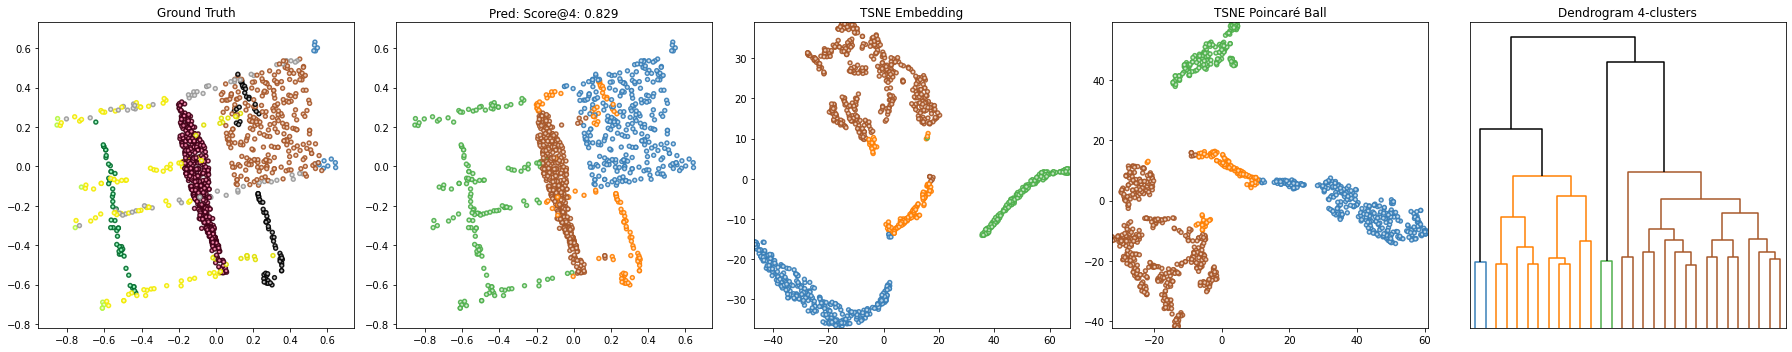

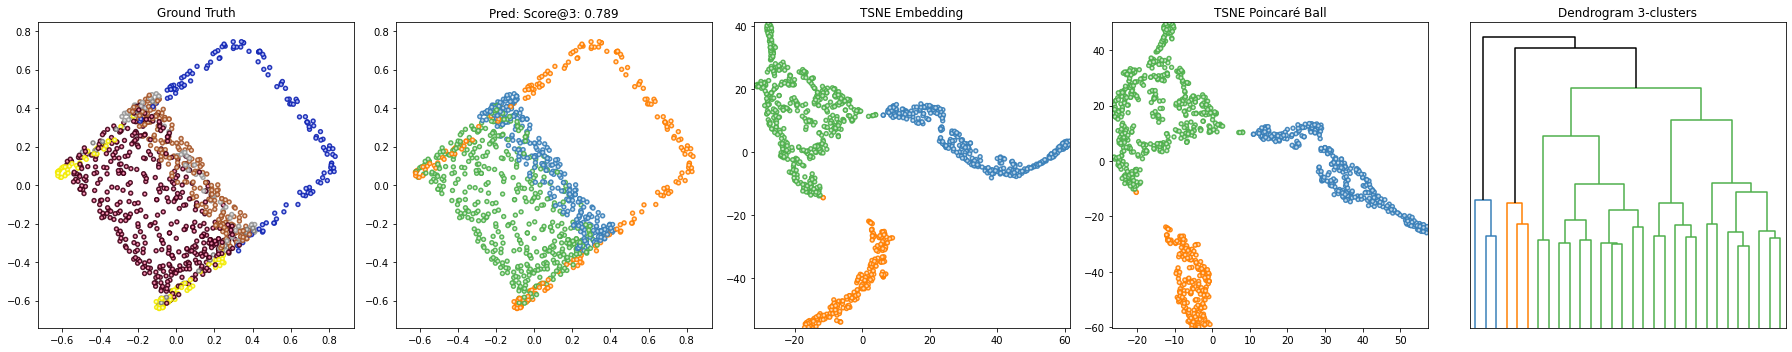

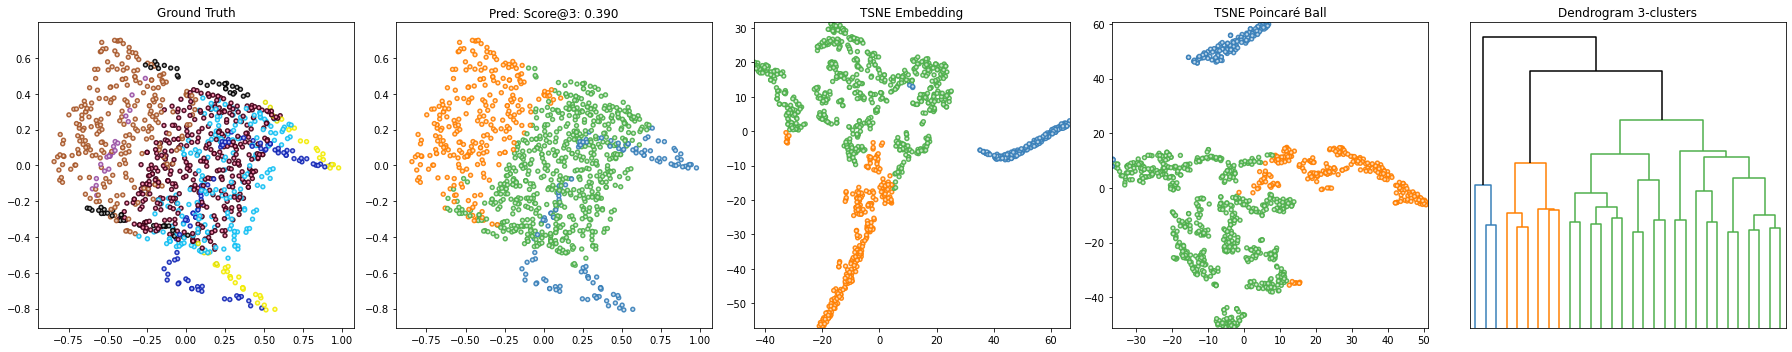

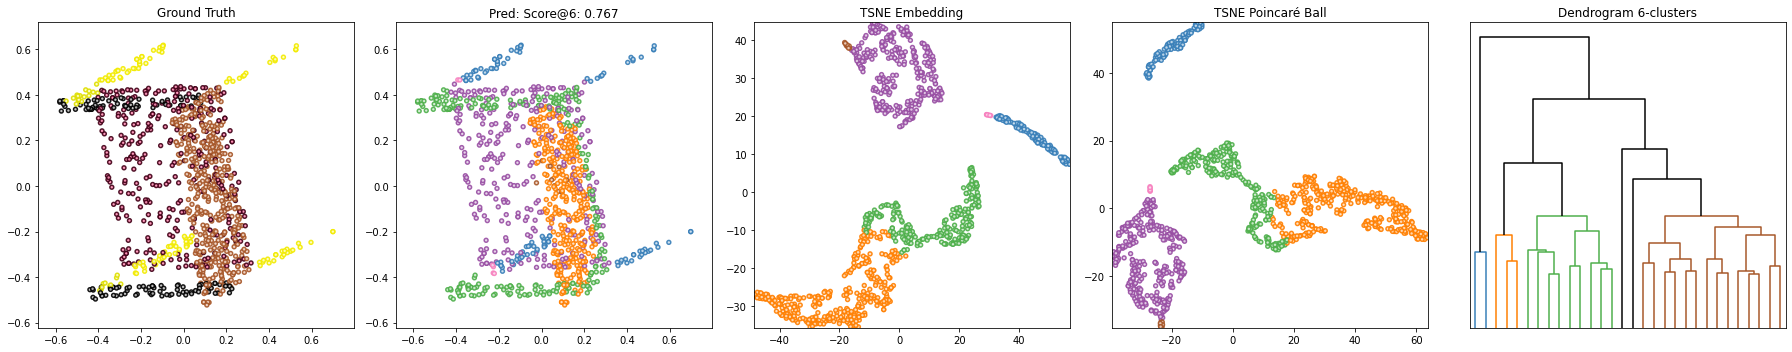

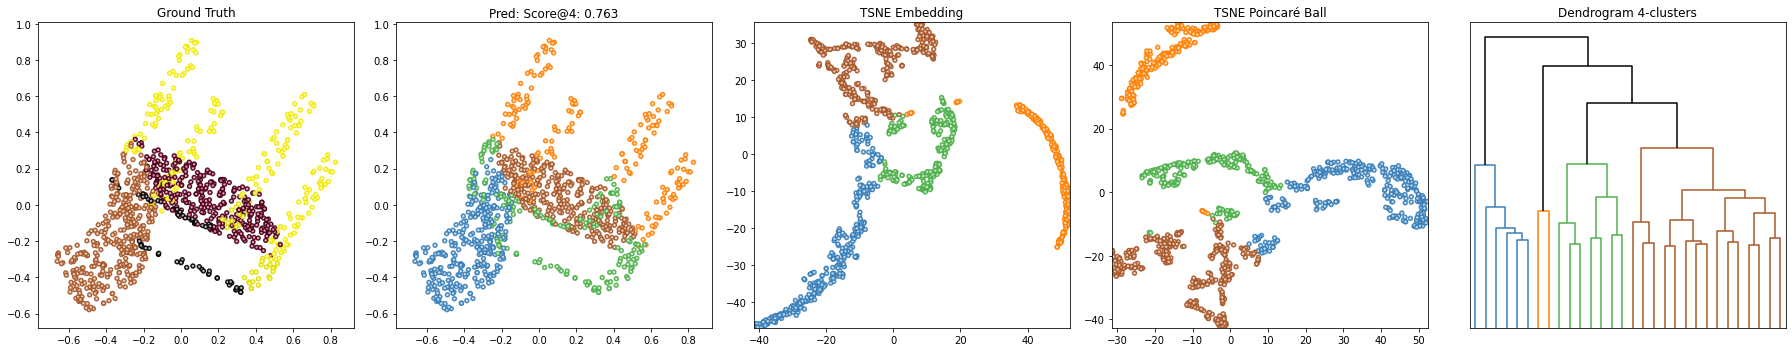

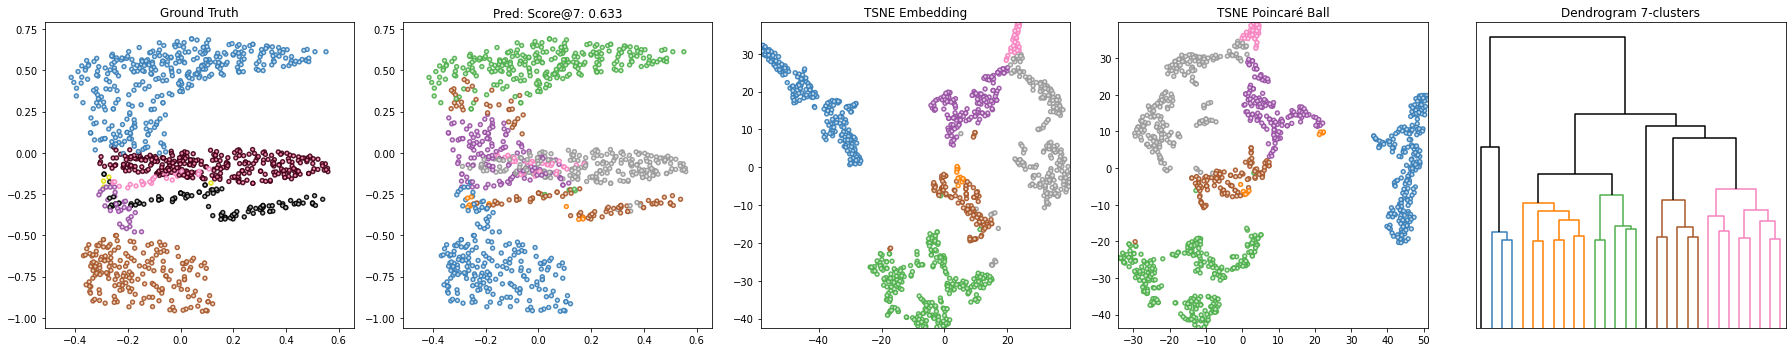

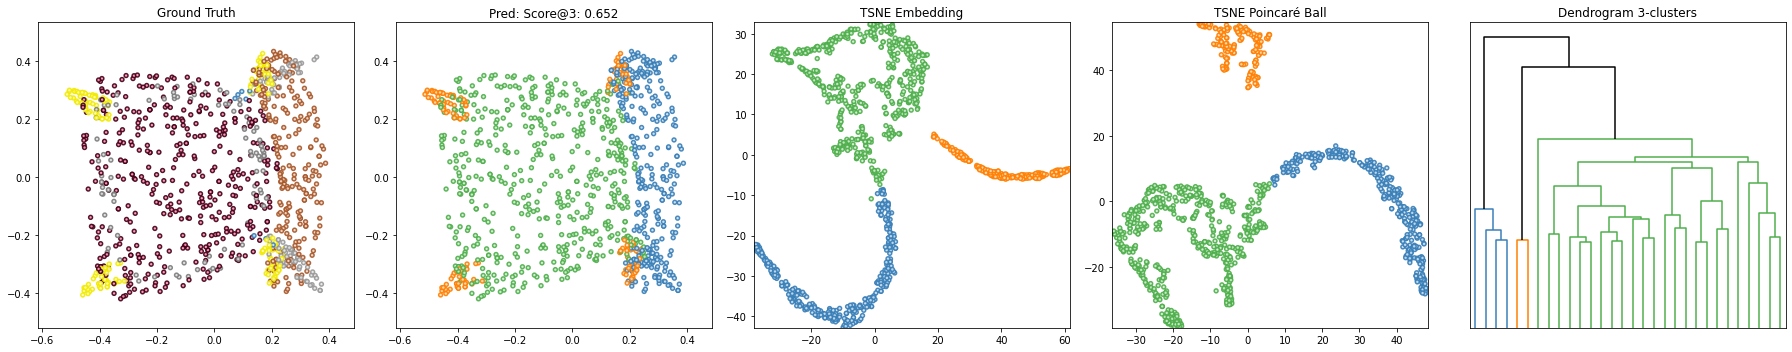

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
          score             0.5851963758468628
        test_loss           2.0741372108459473
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'score': 0.5851963758468628, 'test_loss': 2.0741372108459473}]

In [8]:
trainer.test(model, test_loader)